Đây là notebook của Chung Thế Thọ dùng để phân tích và trực quan hóa hai câu hỏi sau:
- Nghệ sị nào có nhiều playlist nhất 
- Lượt (playback, like,) -> lượt follow

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load dataset
df = pd.read_csv("../Data Warehouse/Data Warehouse/user.csv")

df # Xem qua dữ liệu

,avatar_url,city,comments_count,country_code,created_at,followers_count,followings_count,first_name,id,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,track_count,username,verified
0,https://i1.sndcdn.com/avatars-97PyQxc0CC3EjzWE...,Tokyo,15,JP,2019-05-02T08:00:39Z,40963,17,NaN,630253005,2021-10-29T11:01:14Z,NaN,23,0,https://soundcloud.com/roa_music1031,0,134,Roa,True
1,https://i1.sndcdn.com/avatars-Z9f2ZHjqZ2RSas7J...,NaN,283,NaN,2016-04-06T15:07:33Z,14000,201,NaN,217441590,2021-05-31T07:59:27Z,NaN,760,10,https://soundcloud.com/freetousemusic,5,61,Free To Use Music,True
2,https://i1.sndcdn.com/avatars-000387803255-gfw...,NaN,117,NaN,2017-08-06T09:37:27Z,12509,212,NaN,324531068,2019-04-10T18:47:43Z,NaN,727,0,https://soundcloud.com/royaltyfreemusic-nocopy...,9,64,Royalty Free Music - No Copyright Music,False
3,https://i1.sndcdn.com/avatars-GGWLITcX3rkTeohx...,NaN,231,NaN,2018-10-17T17:18:35Z,122746,16,NaN,525378972,2021-10-14T12:17:12Z,NaN,41,1,https://soundcloud.com/liqwyd,7,97,LiQWYD,True
4,https://i1.sndcdn.com/avatars-nyqUD36teBzn9yET...,NaN,121,NaN,2011-12-16T18:35:32Z,59057,9,NaN,9855085,2021-08-20T12:15:00Z,NaN,1203,0,https://soundcloud.com/declandp,4,59,Declan DP,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12024,https://i1.sndcdn.com/avatars-000062965281-pvu...,NaN,5,PL,2013-12-15T21:15:22Z,395,1,NaN,70584473,2019-11-08T22:18:39Z,NaN,1,0,https://soundcloud.com/myapplepl,4,617,MyApple.pl,False
12025,https://i1.sndcdn.com/avatars-JO0sSvPsnPeW9Q52...,NaN,44,BR,2012-01-31T19:41:53Z,7908,3,Tecnoblog,11458857,2021-04-29T21:15:54Z,NaN,2,1,https://soundcloud.com/tecnoblog,1,224,Tecnocast,True
12026,https://i1.sndcdn.com/avatars-000163838094-anq...,"Petaluma, CA",0,NaN,2015-08-19T02:16:46Z,534,1,Leo,169185192,2019-10-01T00:02:26Z,Laporte,0,0,https://soundcloud.com/the_tech_guy,0,631,The Tech Guy,False
12027,https://i1.sndcdn.com/avatars-000164066046-hlt...,"Petaluma, CA",0,US,2015-08-19T19:53:56Z,862,3,NaN,169313522,2019-10-01T00:02:27Z,NaN,0,0,https://soundcloud.com/this-week-in-tech,0,333,This Week in Tech,False


# Nghệ sĩ nào có nhiều playlist nhất?
Đầu tiên ta xem tập dữ liệu user sau khi sort lại số lượng playlist từ lớn đến bé. 

In [20]:
# Sort theo số lượng playlist
# rồi xem phần đầu
df.sort_values('playlist_count', ascending=False).head(10)

,avatar_url,city,comments_count,country_code,created_at,followers_count,followings_count,first_name,id,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,track_count,username,verified
5695,https://i1.sndcdn.com/avatars-000333045488-7fj...,CLUB.NL Pheromone Nights & KIWILAN,28534,NL,2010-09-27T12:03:30Z,3258,1995,Arthur,1787682,2021-02-16T17:07:03Z,Detour A 2 D 2,20052,4728,https://soundcloud.com/artoo-detoo,19134,24,Arthur Detour NL Official,False
11310,https://i1.sndcdn.com/avatars-tygldql6gZe0Nkc8...,Ibiza,28006,ES,2012-12-26T16:26:05Z,11752,1982,NEWS,31287491,2021-11-01T22:16:08Z,PORTAL,21032,4557,https://soundcloud.com/planetibiza,2904,796,PLANET IBIZA,False
11388,https://i1.sndcdn.com/avatars-fUQTi010mJY0bz5B...,Helsinki,1354,FI,2017-05-02T18:57:56Z,29038,800,Record,304954708,2021-10-27T16:07:24Z,Label,1550,1868,https://soundcloud.com/ayyofree,1959,516,AY YO TRIP!,True
12006,https://i1.sndcdn.com/avatars-000676912385-tyd...,NaN,0,NaN,2013-11-20T18:34:23Z,1382,2,NaN,67274528,2021-11-03T15:58:44Z,NaN,0,0,https://soundcloud.com/the-gary-sharp-show,1649,19332,The Gary Sharp Show,False
12007,https://i1.sndcdn.com/avatars-000142060183-ti1...,"Omaha, NE",0,US,2015-04-14T19:36:32Z,1627,4,NaN,148158448,2021-11-03T19:13:47Z,NaN,9,1,https://soundcloud.com/unsportsmanlike-conduct-1,1610,23274,Unsportsmanlike Conduct,False
11885,https://i1.sndcdn.com/avatars-VgPABl5zon8SMmuv...,Amsterdam,1,NL,2013-09-17T12:19:17Z,290744,5,A State Of Trance,58502729,2021-10-18T09:41:06Z,NaN,195,1,https://soundcloud.com/astateoftrance,1533,927,A State Of Trance,True
5881,https://i1.sndcdn.com/avatars-hNi8wz9wN24NRNAZ...,Amsterdam,87,NL,2012-11-22T20:33:02Z,295381,103,Armada,28884239,2021-11-01T10:28:35Z,Music,16,0,https://soundcloud.com/armadamusic,1525,2233,Armada Music,True
10086,https://i1.sndcdn.com/avatars-hNi8wz9wN24NRNAZ...,Amsterdam,87,NL,2012-11-22T20:33:02Z,295322,103,Armada,28884239,2021-10-11T13:15:15Z,Music,16,0,https://soundcloud.com/armadamusic,1523,2232,Armada Music,True
680,https://i1.sndcdn.com/avatars-77V2bju9gpDRVz8u...,NaN,1,NaN,2018-09-18T14:10:02Z,106,2000,Abele,510722982,2021-03-10T11:18:12Z,Vandrier,1783,1584,https://soundcloud.com/abele-vandrier,1501,0,Abele Vandrier,False
10288,https://i1.sndcdn.com/avatars-XF8ggizJPkREuPln...,NaN,1803,NaN,2013-10-29T15:58:59Z,73498,1764,RECORD LABEL & LABEL PARTY,64160816,2021-10-22T18:17:48Z,NaN,4487,3327,https://soundcloud.com/gmafiarecords,1389,1468,G-MAFIA RECORDS,True


Qua đó ta thấy có các dòng dữ bị trùng username, điều này xảy ra do merge 2 dataset khác nhau lại. Hãy xem bao nhiêu dòng bị trùng qua đoạn code dưới

In [4]:
len(df) - len(set(df['username']))

225

Vì vậy để xử lý 223 dòng trùng dữ liệu này, ta sẽ bỏ bớt 1 dòng, độ chênh lệch giữa 2 dòng không quá cao nên ta loại bỏ dòng nào cũng được.

In [23]:
# Loại bỏ các dòng trùng username
df = df.drop_duplicates(subset='username', keep="last")

df.sort_values('playlist_count', ascending=False).head(10)

,avatar_url,city,comments_count,country_code,created_at,followers_count,followings_count,first_name,id,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,track_count,username,verified
5695,https://i1.sndcdn.com/avatars-000333045488-7fj...,CLUB.NL Pheromone Nights & KIWILAN,28534,NL,2010-09-27T12:03:30Z,3258,1995,Arthur,1787682,2021-02-16T17:07:03Z,Detour A 2 D 2,20052,4728,https://soundcloud.com/artoo-detoo,19134,24,Arthur Detour NL Official,False
11310,https://i1.sndcdn.com/avatars-tygldql6gZe0Nkc8...,Ibiza,28006,ES,2012-12-26T16:26:05Z,11752,1982,NEWS,31287491,2021-11-01T22:16:08Z,PORTAL,21032,4557,https://soundcloud.com/planetibiza,2904,796,PLANET IBIZA,False
11388,https://i1.sndcdn.com/avatars-fUQTi010mJY0bz5B...,Helsinki,1354,FI,2017-05-02T18:57:56Z,29038,800,Record,304954708,2021-10-27T16:07:24Z,Label,1550,1868,https://soundcloud.com/ayyofree,1959,516,AY YO TRIP!,True
12006,https://i1.sndcdn.com/avatars-000676912385-tyd...,NaN,0,NaN,2013-11-20T18:34:23Z,1382,2,NaN,67274528,2021-11-03T15:58:44Z,NaN,0,0,https://soundcloud.com/the-gary-sharp-show,1649,19332,The Gary Sharp Show,False
12007,https://i1.sndcdn.com/avatars-000142060183-ti1...,"Omaha, NE",0,US,2015-04-14T19:36:32Z,1627,4,NaN,148158448,2021-11-03T19:13:47Z,NaN,9,1,https://soundcloud.com/unsportsmanlike-conduct-1,1610,23274,Unsportsmanlike Conduct,False
11885,https://i1.sndcdn.com/avatars-VgPABl5zon8SMmuv...,Amsterdam,1,NL,2013-09-17T12:19:17Z,290744,5,A State Of Trance,58502729,2021-10-18T09:41:06Z,NaN,195,1,https://soundcloud.com/astateoftrance,1533,927,A State Of Trance,True
10086,https://i1.sndcdn.com/avatars-hNi8wz9wN24NRNAZ...,Amsterdam,87,NL,2012-11-22T20:33:02Z,295322,103,Armada,28884239,2021-10-11T13:15:15Z,Music,16,0,https://soundcloud.com/armadamusic,1523,2232,Armada Music,True
680,https://i1.sndcdn.com/avatars-77V2bju9gpDRVz8u...,NaN,1,NaN,2018-09-18T14:10:02Z,106,2000,Abele,510722982,2021-03-10T11:18:12Z,Vandrier,1783,1584,https://soundcloud.com/abele-vandrier,1501,0,Abele Vandrier,False
10288,https://i1.sndcdn.com/avatars-XF8ggizJPkREuPln...,NaN,1803,NaN,2013-10-29T15:58:59Z,73498,1764,RECORD LABEL & LABEL PARTY,64160816,2021-10-22T18:17:48Z,NaN,4487,3327,https://soundcloud.com/gmafiarecords,1389,1468,G-MAFIA RECORDS,True
11006,https://i1.sndcdn.com/avatars-000082594462-4lh...,New York,0,US,2013-03-21T17:27:01Z,40362,2,The Howard Stern,39782961,2020-11-22T13:29:55Z,Show,5,0,https://soundcloud.com/howardstern,1064,4610,Howard Stern,True


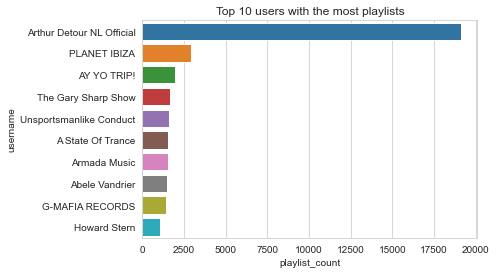

In [25]:
# Sort the dataset by playlist_count in  descending order
# then take the first 10 rows
top10_num_playlist = df.sort_values('playlist_count', ascending=False).head(10)

# Set background style
sns.set_style("whitegrid")

# Create Figure and Axes object
fig, ax = plt.subplots()

# Horizontal bar chart
# bar color represents for that country's region
sns.barplot(x='playlist_count', y='username',
            data=top10_num_playlist,
             dodge=False,)

plt.title('Top 10 users with the most playlists') # Chart title
# plt.ticklabel_format(style='plain', axis='x') # Change format of ticks on y axis

# Show the chart
plt.show()

# Save the image
# bbox_inches = 'tight': prevent the plot being cropped
fig.savefig("top_10_user_most_playlist.png", bbox_inches = 'tight')

### Nhận xét
User có nhiều playlist nhất vượt hẳn các user còn lại (gần như gấp gần 4 lần user thứ 2). Nếu xem vào cột ngày tạo tài khoản thì user này cũng được tạo cũng từ rất sớm từ năm 2010.

In [26]:
top10_num_playlist[['username', 'created_at']]

,username,created_at
5695,Arthur Detour NL Official,2010-09-27T12:03:30Z
11310,PLANET IBIZA,2012-12-26T16:26:05Z
11388,AY YO TRIP!,2017-05-02T18:57:56Z
12006,The Gary Sharp Show,2013-11-20T18:34:23Z
12007,Unsportsmanlike Conduct,2015-04-14T19:36:32Z
11885,A State Of Trance,2013-09-17T12:19:17Z
10086,Armada Music,2012-11-22T20:33:02Z
680,Abele Vandrier,2018-09-18T14:10:02Z
10288,G-MAFIA RECORDS,2013-10-29T15:58:59Z
11006,Howard Stern,2013-03-21T17:27:01Z


Nhưng nếu nhìn vào số bài hát user này có thì lại rất ít, chỉ có 24 bài hát.

In [27]:
top1_num_playlist = top10_num_playlist[top10_num_playlist['username'] == 'Arthur Detour NL Official']
top1_num_playlist[['username', 'playlist_count', 'track_count']]

,username,playlist_count,track_count
5695,Arthur Detour NL Official,19134,24


### Khám phá user dị thường này
Nhưng khi ta vào trang Soundcloud của người dùng này và vào mục playlist, điều thú vị là mỗi playlist của user này chỉ có duy nhất một track. Và nếu đối chiếu kỹ hơn các track user này có thì nhiều track trong playlist này bị lặp lại và cũng nhiều track chỉ tìm thấy trong phần playlist của user.

![User with highest number of playlists](img1.jpg)

Ngoài ra thêm một chi tiết thú vị là khi thu thập dữ liệu, khi duyệt đến user này, vòng lặp dùng để thu thập dữ liệu các playlist của user này lặp vô tận khi số lượng thu thập đã vượt hơn 19134 (bình thường khi thu thập đủ số lượng playlist của một user, vòng lặp sẽ tự động chuyển sang user khác). Và khi ta xem xét các playlist vượt con số 19134 này thì từ playlist 19135 trở đi, toàn bộ playlist đều rỗng không chứa track, phải chăng đây là bot do Soundcloud cài vào để ngăn chặn việc crawl? Nhưng nếu xem xét kỹ thì user này có follow người khác và người khác cũng follow user này, thậm chí là comment và tương tác lẫn nhau nên có vẻ user này không phải là bot.

# Làm sao để một user được nhiều người follow?
Lượt follow giúp bài hát của user đó được lan truyền nhanh hơn, từ đó độ nổi tiếng của user đó cũng được tăng theo. Vì vậy nếu ta tìm được mối quan hệ giữa các thuộc tính của một user và lượt follow của user đó, thì chỉ cần làm theo quan hệ này là lượt follow sẽ được tăng.

Để trả lời câu hỏi này, ta sẽ xem mối quan hệ giữa các trường đếm khác với followers_count. Trước hết ta xem các biến đếm này có bị thiếu dữ liệu hay không?

In [28]:
list_count_cols = [col for col in df.columns if 'count' in col]


# We remove country_code from list_count_cols
list_count_cols.remove('country_code')
print('-'*30)
print(df[list_count_cols].info())

------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11804 entries, 0 to 12028
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   comments_count        11804 non-null  int64
 1   followers_count       11804 non-null  int64
 2   followings_count      11804 non-null  int64
 3   likes_count           11804 non-null  int64
 4   playlist_likes_count  11804 non-null  int64
 5   playlist_count        11804 non-null  int64
 6   track_count           11804 non-null  int64
dtypes: int64(7)
memory usage: 737.8 KB
None


### Nhận xét:
Kết quả trả về cho ta thấy các cột này đều đầy đủ dữ liệu nên ta không cần phải xử lý việc điện dữ liệu thiếu.

Tiếp theo trước khi mối quan hệ giữa các biến count này với playlist_count, ta trực quan hóa phân bố của chúng để xem có cần loại bỏ outlier không?

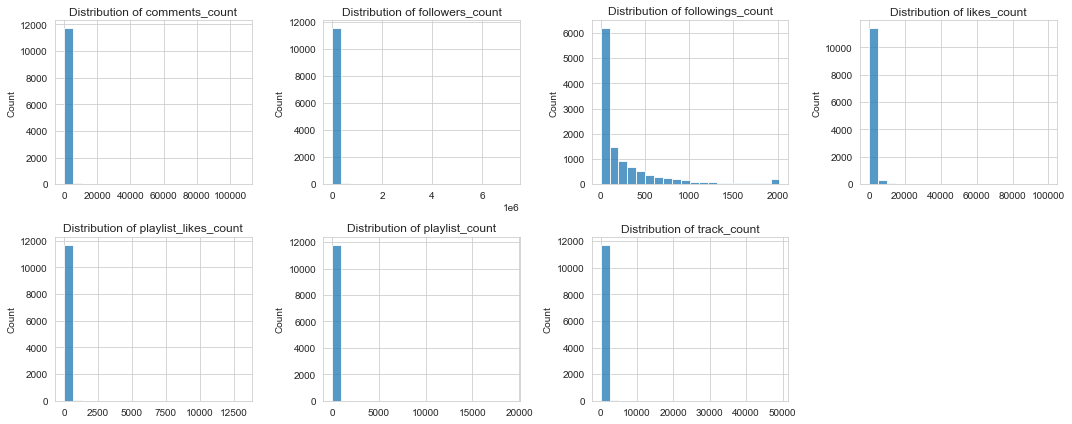

In [29]:
fig, axes = plt.subplots(2,4, figsize=(15, 6))
for col, ax in zip(list_count_cols, axes.flatten()):
    sns.histplot(data=df, x=col, bins=20, ax=ax)
    ax.set(title=f'Distribution of {col}', xlabel=None)

fig.delaxes(axes[1,3])
fig.tight_layout()
plt.show()

### Nhận xét:
Qua đó ta thấy toàn bộ thuộc tính đều bị lệch dương và lệch rất nặng, gần như toàn bộ dữ liệu nằm trong cột trái. Vì vậy ta sẽ đi loại đi outlier bằng cách dùng IQR. Sau đó ta plot lại histogram của từng thuộc tính để xem lại phân bố. 

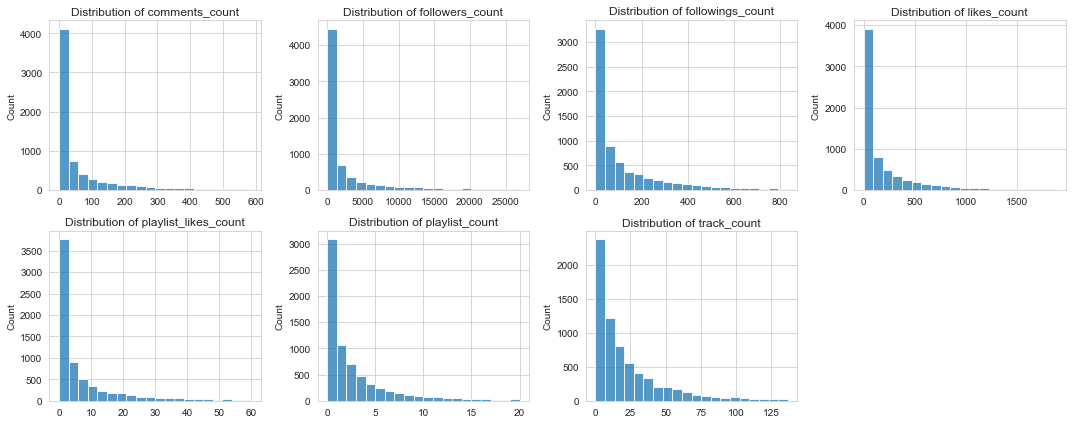

In [30]:
Q1 = df[list_count_cols].quantile(0.25)
Q3 = df[list_count_cols].quantile(0.75)
IQR = Q3 - Q1

df_without_outlier = df[~((df[list_count_cols] < (Q1 - 1.5 * IQR)) |(df[list_count_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

fig, axes = plt.subplots(2,4, figsize=(15, 6))
for col, ax in zip(list_count_cols, axes.flatten()):
    sns.histplot(data=df_without_outlier, x=col, bins=20, ax=ax)
    ax.set(title=f'Distribution of {col}', xlabel=None)

fig.delaxes(axes[1,3])
fig.tight_layout()
plt.show()

### Nhận xét:
Kết quả cho thấy các phân bố đã đỡ lệch hơn nhưng vẫn còn và vì tất cả đều cùng lệch dương nên ta có thể dùng tập dữ liệu này để đi xem mối quan hệ giữa các biến đếm và lượt follow. Ta sẽ làm điều này bằng scatter plot

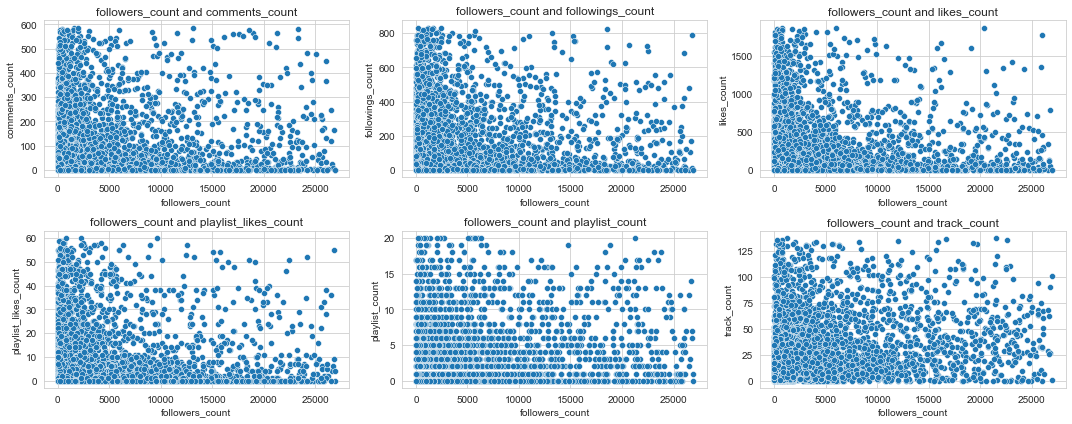

In [32]:
if 'followers_count' in list_count_cols:
    list_count_cols.remove('followers_count')
    
fig, axes = plt.subplots(2,3, figsize=(15, 6))
for col, ax in zip(list_count_cols, axes.flatten()):
    sns.scatterplot(data=df_without_outlier, x='followers_count', y=col, ax=ax)
    ax.set(title=f'followers_count and {col}')

fig.tight_layout()
plt.show()

### Nhận xét:
Qua ma trận các scatter plot trên, có vẻ là giữa các biến đếm và followers_count tỉ lệ nghịch với nhau nghĩa là muốn nhiều người follow thì làm mọi thứ ít lại, điều này thoạt nghe có vẻ vô lý nên ta xem qua thử 15 user có nhiều người follow nhất.

In [35]:
top_15_most_followers_count = df.sort_values('followers_count', ascending=False).head(15)
top_15_most_followers_count

,avatar_url,city,comments_count,country_code,created_at,followers_count,followings_count,first_name,id,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,track_count,username,verified
2314,https://i1.sndcdn.com/avatars-QF34Hty2xnwv4hVV...,"Dumfries, Scotland",3,NaN,2009-08-13T18:55:00Z,7167317,0,Calvin,208934,2021-08-06T04:16:47Z,Harris,0,0,https://soundcloud.com/calvinharris,70,328,Calvin Harris,True
10167,https://i1.sndcdn.com/avatars-cBNtGGxT9Is4zSEy...,Philadelphia,97,US,2008-10-05T04:00:12Z,7102921,1146,diplo,16730,2021-09-28T17:00:35Z,NaN,642,36,https://soundcloud.com/diplo,88,524,Diplo,True
10342,https://i1.sndcdn.com/avatars-Hj4vOjdcx2256uzp...,Los Angeles,9,US,2010-04-12T17:48:00Z,6496955,95,Sonny,856062,2021-08-20T04:05:03Z,Moore,14,3,https://soundcloud.com/skrillex,23,110,Skrillex,True
10692,https://i1.sndcdn.com/avatars-UeyAINJUDtKizwXG...,Toronto,0,CA,2011-02-21T11:21:15Z,6285724,0,NaN,3274725,2021-08-06T13:47:12Z,NaN,0,0,https://soundcloud.com/theweeknd,35,217,The Weeknd,True
2208,https://i1.sndcdn.com/avatars-4UOzW0YzsEUnMtkx...,Los Angeles,33,US,2009-06-17T19:24:28Z,6137580,451,Dillon,146393,2021-10-29T04:02:54Z,Francis,54,1,https://soundcloud.com/dillonfrancis,43,274,DILLONFRANCIS,True
10346,https://i1.sndcdn.com/avatars-000000711562-05g...,Toronto,6,CA,2009-10-09T20:16:57Z,6011803,189,Zeds,305413,2021-10-05T15:51:24Z,Dead,80,3,https://soundcloud.com/zedsdead,85,263,Zeds Dead,True
3122,https://i1.sndcdn.com/avatars-000302284113-fhx...,#HDYNATION,244,US,2009-10-13T21:20:08Z,5882349,335,#HDYBYZ,312963,2020-11-18T17:40:48Z,NaN,204,11,https://soundcloud.com/flosstradamus,26,133,Flosstradamus,True
9209,https://i1.sndcdn.com/avatars-XviwOEisek9kHtgV...,Los Angeles,0,US,2009-08-03T20:39:19Z,5827010,0,Flying,196380,2020-11-18T17:53:29Z,Lotus,0,0,https://soundcloud.com/flyinglotus,13,242,Flyinglotus,True
5729,https://i1.sndcdn.com/avatars-000325082783-enl...,New York,3,US,2009-08-22T00:17:19Z,5808492,183,A-Trak,222324,2021-05-13T01:33:58Z,NaN,153,14,https://soundcloud.com/a-trak,31,214,A-Trak,True
6874,https://i1.sndcdn.com/avatars-000244771244-uch...,London,1,GB,2009-04-17T15:35:00Z,5177798,74,Domino,102594,2021-02-08T15:34:45Z,Recording Co,160,31,https://soundcloud.com/dominorecordco,56,126,Domino Record Co,True


### Nhận xét:
Các user này đã đúng theo suy luận ở trên, mặc dù lượng follower rất cao nhưng các thuộc tính đếm còn lại của user này thì lại rất thấp. Vì vậy để rõ hơn, tôi đã vào trang Soundcloud của các user này. Tôi đã đặt khía cạnh mình là một người nghe nhạc bình thường thì sau khi nghe nhạc của các user này, có thể nói là tất cả bài hát của họ rất "catchy", nghĩa là nghe rất lọt tai, nốt thăng nốt trầm hợp lý. Và trong 15 user này, có nhiều dòng nhạc khác nhau nhưng chiếm nhiều nhất là dòng nhạc điện tử (EDM). Với dòng nhạc này thì có user tự sáng tác, có user đi remix lại các hit của các dòng nhạc (Pop, R&B, ...).

Tôi cũng có đi xem thử các user có các thuộc tính đếm khác cao nhưng lại có lượt follow không quá cao. Điểm chung của các user này là nhạc của họ rất freestyle và nghiệp dư. Các thuộc tính đếm cao như lượt comment, lượt like, lượt share, lượt following (là user này follow user khác) đều liên quan đến vấn đề tương tác, và các người tương tác với các user này cũng là user nghiệp dư và sáng tạc freestyle. Vì vậy có vẻ các user có biến đếm tương tác cao là vì họ nhận xét, khen chê nhạc lẫn nhau trong cộng đồng của họ. Tôi cũng có dùng một correlogram (xem bên dưới) để xem giữa các bếp tương tác này có quan hệ gì với nhau không thì dường như là không, chỉ có vài cặp có xu hướng tỉ lệ nghịch với nhau nhưng không rõ.

Từ đó có thể rút ra kết luận, để tăng lượt follow, có vẻ là việc sáng tác nhạc chất lượng, nhạc hay là cách tốt nhất ở trên Soudcloud chứ việc kiếm tương tác nhiều sẽ không tăng lượt follow của ta. Ngoài ra qua các tìm hiểu này ta cũng rút ra xu hướng của mọi người là khi nghe các bài hát hay, họ chỉ thích nghe chứ không thích tương tác.



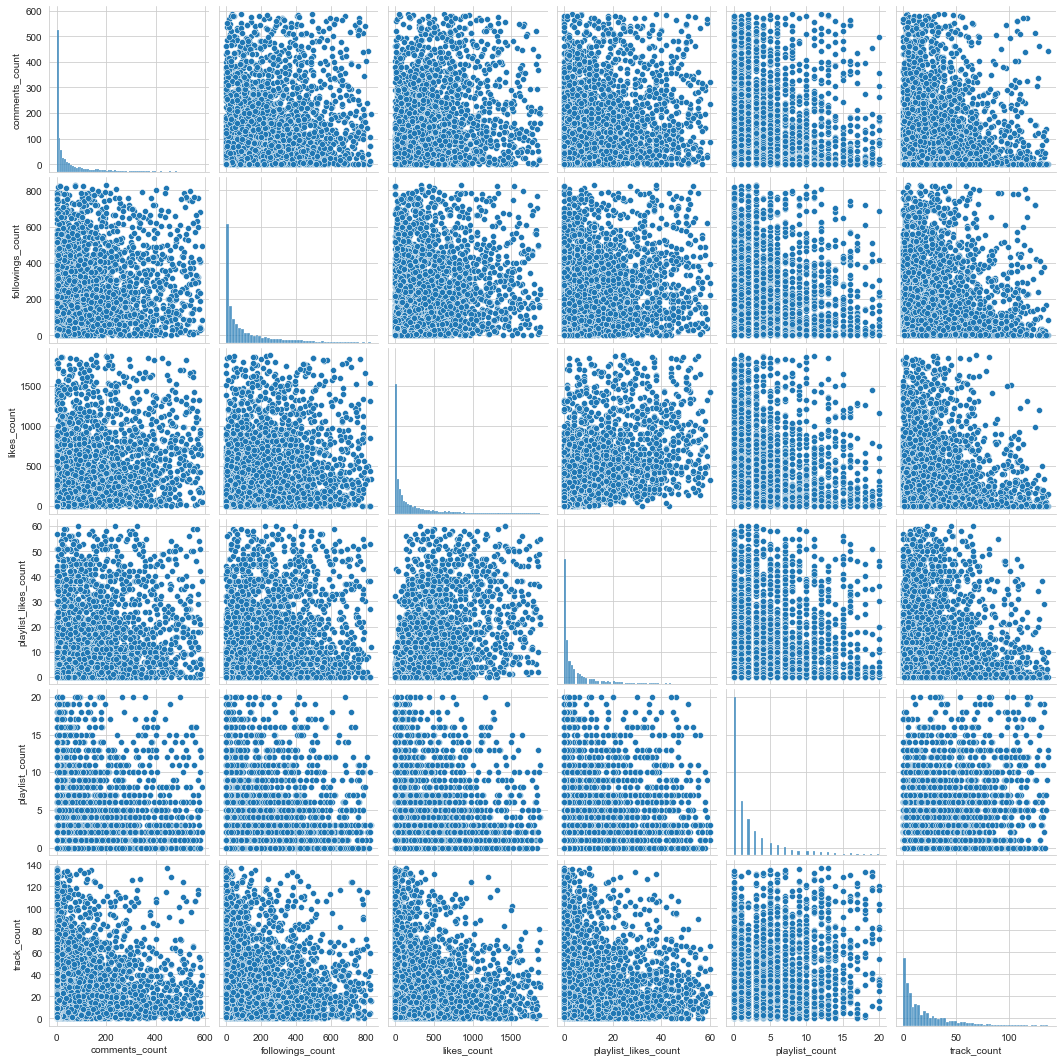

In [48]:
sns.pairplot(df_without_outlier[list_count_cols])